In [186]:
# load brain data
# plot subcortical in canlab atlas
# plot parcel in glasser
# plot in MNI
import os
from os.path import join
from neuromaps.parcellate import Parcellater
from matplotlib.colors import LinearSegmentedColormap, to_rgba
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from nilearn import plotting, image, glm
from neuromaps.datasets import fetch_fslr
from neuromaps import transforms
import nibabel as nib

# Overview


Here, I plot the image outputs from the mediation analysis
We'll plot in MNI and surface plots

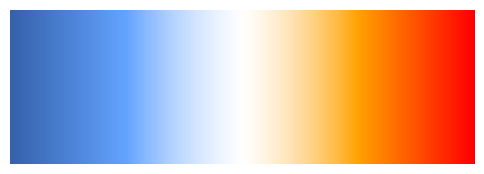

In [198]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, to_rgba

# Define the colors with specified opacities
colors_with_opacity = [
    (-0.015, to_rgba("#3661ab", alpha=1.0)),  # Fully opaque
    (-0.0005, to_rgba("#63a4ff", alpha=1)),    # Fully opaque
    (0, to_rgba("white", alpha=0.5)),          # Transparent
    (0.0005, to_rgba("#ffa300", alpha=1)),    # Fully opaque
    (0.015, to_rgba("#ff0000", alpha=1.0))   # Fully opaque
]

# Normalize the points to the [0, 1] interval and prepare the colors for the colormap
norm_points = np.linspace(-0.045, 0.045, len(colors_with_opacity))
norm_points = (norm_points - norm_points.min()) / (norm_points.max() - norm_points.min())
norm_colors = [c[1] for c in colors_with_opacity]

# Create a custom colormap
cmap = LinearSegmentedColormap.from_list("custom_gradient", list(zip(norm_points, norm_colors)))

# Create a gradient to visualize the colormap
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

# Plot the gradient
fig, ax = plt.subplots(figsize=(6, 2))
ax.imshow(gradient, aspect='auto', cmap=cmap)
ax.set_axis_off()

plt.show()


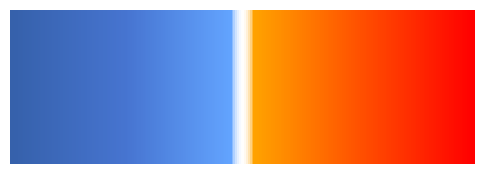

In [228]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, to_rgba

# Define the colors with specified opacities
colors_with_opacity = [
    (-20, to_rgba("#3661ab", alpha=1.0)),  # Fully opaque
    (-10, to_rgba('#4775d1', alpha=1)),
    (-1, to_rgba("#63a4ff", alpha=1)),    # Fully opaque
    (0, to_rgba("white", alpha=0)),            # Transparent
    
    (1, to_rgba("#ffa300", alpha=1)),     # Fully opaque
    (10, to_rgba('#FF5200', alpha=1)),
    (20, to_rgba("#ff0000", alpha=1.0))     # Fully opaque
]


# Adjust normalization points
# Since the original approach equally spaces colors, and you want to exclude 0,
# we need to manually specify the points to ensure the gradient appears as desired.
# This step involves careful adjustment.

# Determine new normalization points directly
norm_points = np.array([-20, -10, -1, 0, 1, 10, 20])

# Normalize these points to the [0, 1] range
min_point, max_point = norm_points.min(), norm_points.max()
norm_points = (norm_points - min_point) / (max_point - min_point)

# Prepare colors for the colormap
norm_colors = [c[1] for c in colors_with_opacity]

# Create the custom colormap
testcmap = LinearSegmentedColormap.from_list("custom_gradient", list(zip(norm_points, norm_colors)))

# Create a gradient to visualize the colormap
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

# Plot the gradient
fig, ax = plt.subplots(figsize=(6, 2))
ax.imshow(gradient, aspect='auto', cmap=testcmap)
ax.set_axis_off()

plt.show()


In [204]:
from nilearn import image, plotting
from surfplot import Plot
from neuromaps.transforms import fsaverage_to_fslr
import glob
from matplotlib.colors import LinearSegmentedColormap, Normalize, to_rgba

def plot_brain_surfaces(image, cbar_label='INSERT LABEL', cmap='viridis', 
                        color_range=None):
                        # filename='brain_surface_plot.png'):
    """
    Plot brain surfaces with the given data.

    Parameters:
    - TST: Tuple of (left hemisphere data, right hemisphere data) to be plotted.
    - cbar_label: Label for the color bar.
    - cmap: Colormap for the data.
    - color_range: Optional. Tuple of (min, max) values for the color range. If not provided, the range is auto-detected.
    - filename: Filename to save the plot. Defaults to 'brain_surface_plot.png'.
    """
    surfaces_fslr = fetch_fslr()
    lh_fslr, rh_fslr = surfaces_fslr['inflated']
    
    p = Plot(surf_lh=lh_fslr,
             surf_rh=rh_fslr, 
             size=(5000, 1000), 
             zoom=1.2, layout='row', 
             views=['lateral', 'medial', 'ventral', 'posterior', 'dorsal'], 
             mirror_views=True, brightness=.7)
    p.add_layer({'left': image[0], 
            'right': image[1]}, 
            cmap=cmap, cbar=True,
            color_range=color_range,
            cbar_label=cbar_label,
            alpha=1,
            zero_transparent=True

            ) # YlOrRd_r

    cbar_kws = dict(outer_labels_only=True, pad=.02, n_ticks=2, decimals=3)
    fig = p.build(cbar_kws=cbar_kws)
#     p.savefig(filename, dpi=300)
    return(fig)
    # fig.show()

# Example usage:
# TST = (left_hemisphere_data, right_hemisphere_data)
# plot_brain_surfaces(TST, cbar_label='gradient', cmap='viridis', color_range=(0, .15))


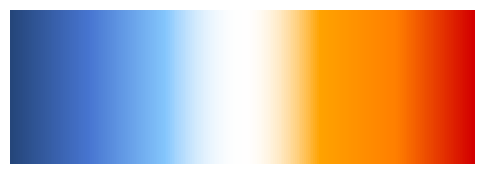

In [205]:
import matplotlib.colors as mcolors

# Define the adjusted colors with higher saturation and contrast
adjusted_colors_with_opacity = [
    (-2, to_rgba("#25467a", alpha=1)),  # Dark blue, fully opaque
    (-1, to_rgba("#4775d1", alpha=1)),  # Brighter blue, fully opaque
    (-.5, to_rgba("#84c6fd", alpha = 1)),
    (0, to_rgba("white", alpha=0)),           # Transparent for zero values
    (-0.5, to_rgba("#ffa300", alpha=1)), 
    (1, to_rgba("#ff7f00", alpha=1)),   # Bright orange, fully opaque
    (2, to_rgba("#d30000", alpha=1))    # Dark red, fully opaque
]

# Normalize the points to the [0, 1] interval and prepare the colors for the colormap
adjusted_norm_points = np.linspace(-2, 2, len(adjusted_colors_with_opacity))
adjusted_norm_points = (adjusted_norm_points - adjusted_norm_points.min()) / (adjusted_norm_points.max() - adjusted_norm_points.min())
adjusted_norm_colors = [c[1] for c in adjusted_colors_with_opacity]

# Create an adjusted custom colormap
adjusted_cmap = LinearSegmentedColormap.from_list("adjusted_custom_gradient", list(zip(adjusted_norm_points, adjusted_norm_colors)))

# Create a gradient to visualize the adjusted colormap
adjusted_gradient = np.linspace(0, 1, 256)
adjusted_gradient = np.vstack((adjusted_gradient, adjusted_gradient))

# Plot the gradient for the adjusted colormap
fig, ax = plt.subplots(figsize=(6, 2))
ax.imshow(adjusted_gradient, aspect='auto', cmap=adjusted_cmap)
ax.set_axis_off()

plt.show()


## parameters

In [206]:
FDR_threshold = 0.004
save_dir = '/Users/h/Documents/projects_local/cue_expectancy/resources/plots_dissertation/mediation'

## convert images

In [207]:
# ab map _______________________________________________________________________
ab = nib.load('./X-M-Y_effect.img')
ab_fname = 'X-cue_M-brain_Y-outcome.nii.gz'
nib.save(ab, ab_fname)

ab_p = nib.load('./X-M-Y_pvals.img')
ab_p_fname = 'X-cue_M-brain_Y-outcome_pvals.nii.gz'
nib.save(ab_p, ab_p_fname)

# a map _______________________________________________________________________
a = nib.load('./X-M_effect.img')
a_fname = 'X-cue_M-brain.nii.gz'
nib.save(a, a_fname)

a_p = nib.load('./X-M_pvals.img')
a_p_fname = 'X-cue_M-brain_pvals.nii.gz'
nib.save(a_p,a_p_fname )

# b map _______________________________________________________________________
b = nib.load('./M-Y_effect.img')
b_fname = 'M-brain_Y-outcome.nii.gz'
nib.save(b, b_fname)

b_p = nib.load('./M-Y_pvals.img')
b_p_fname = 'M-brain_Y-outcome_pvals.nii.gz'
nib.save(b_p, b_p_fname)


In [240]:
# ab map _______________________________________________________________________
ab = image.load_img(ab_fname)
ab_pval = image.load_img(ab_p_fname)

ab_thres = ab.get_fdata() * (ab_pval.get_fdata() < FDR_threshold)
ab_thres_img = image.new_img_like(ab, ab_thres)
ab_thres_img.to_filename('X-cue_M-brain_Y-outcome_thres-fdr05.nii.gz')


# a map _______________________________________________________________________
a = image.load_img(a_fname)
a_pval = image.load_img(a_p_fname)

a_thres = a.get_fdata() * (a_pval.get_fdata() < FDR_threshold)
a_thres_img = image.new_img_like(a, a_thres)
a_thres_img.to_filename('X-cue_M-brain_thres-fdr05.nii.gz')


# b map _______________________________________________________________________
b = image.load_img(b_fname)
b_pval = image.load_img(b_p_fname)
b_data = b.get_fdata(); b_pval_data = b_pval.get_fdata()
b_thres = np.where(b_pval_data < FDR_threshold, np.nan, b_data)
b_thres_img = image.new_img_like(b, b_thres)#nib.Nifti1Image(b_thres, affine=b.affine)


# b_thres = b.get_fdata() * (b_pval.get_fdata() < FDR_threshold)
# b_thres[b_thres == 0] = np.nan
# b_thres_img = image.new_img_like(b, b_thres)
b_thres_img.to_filename('M-brain_Y-outcome_thres-fdr05.nii.gz')

# b_k5 = image.threshold_img(b, threshold=FDR_threshold, cluster_threshold=5, two_sided=True)
# # # b_k5teST = glm.threshold_stats_img(b_k5, alpha=FDR_threshold, cluster_threshold=5)
# b_k5.to_filename('M-brain_Y-outcome_thres-fdr05TST.nii.gz')


(array([2.8900e+02, 3.1040e+03, 1.6139e+04, 2.9391e+04, 2.0329e+04,
        9.4030e+03, 4.0030e+03, 1.6460e+03, 4.2600e+02, 2.6000e+01]),
 array([-0.09353217, -0.0599897 , -0.02644722,  0.00709525,  0.04063773,
         0.0741802 ,  0.10772268,  0.14126515,  0.17480763,  0.2083501 ,
         0.24189258]),
 <BarContainer object of 10 artists>)

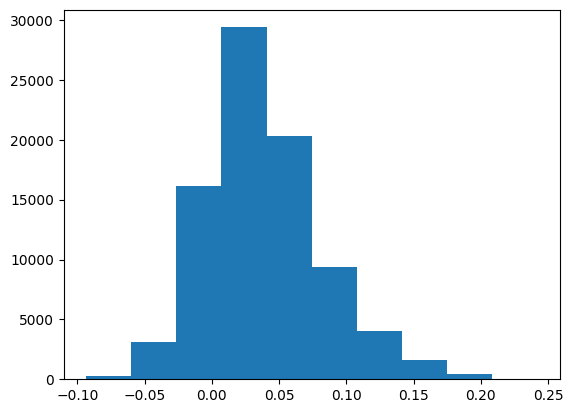

In [227]:
plt.hist(b.get_fdata().ravel() )

## sandbox, figuring out threshold with clusters

/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/_utils/niimg.py:61: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  warn(


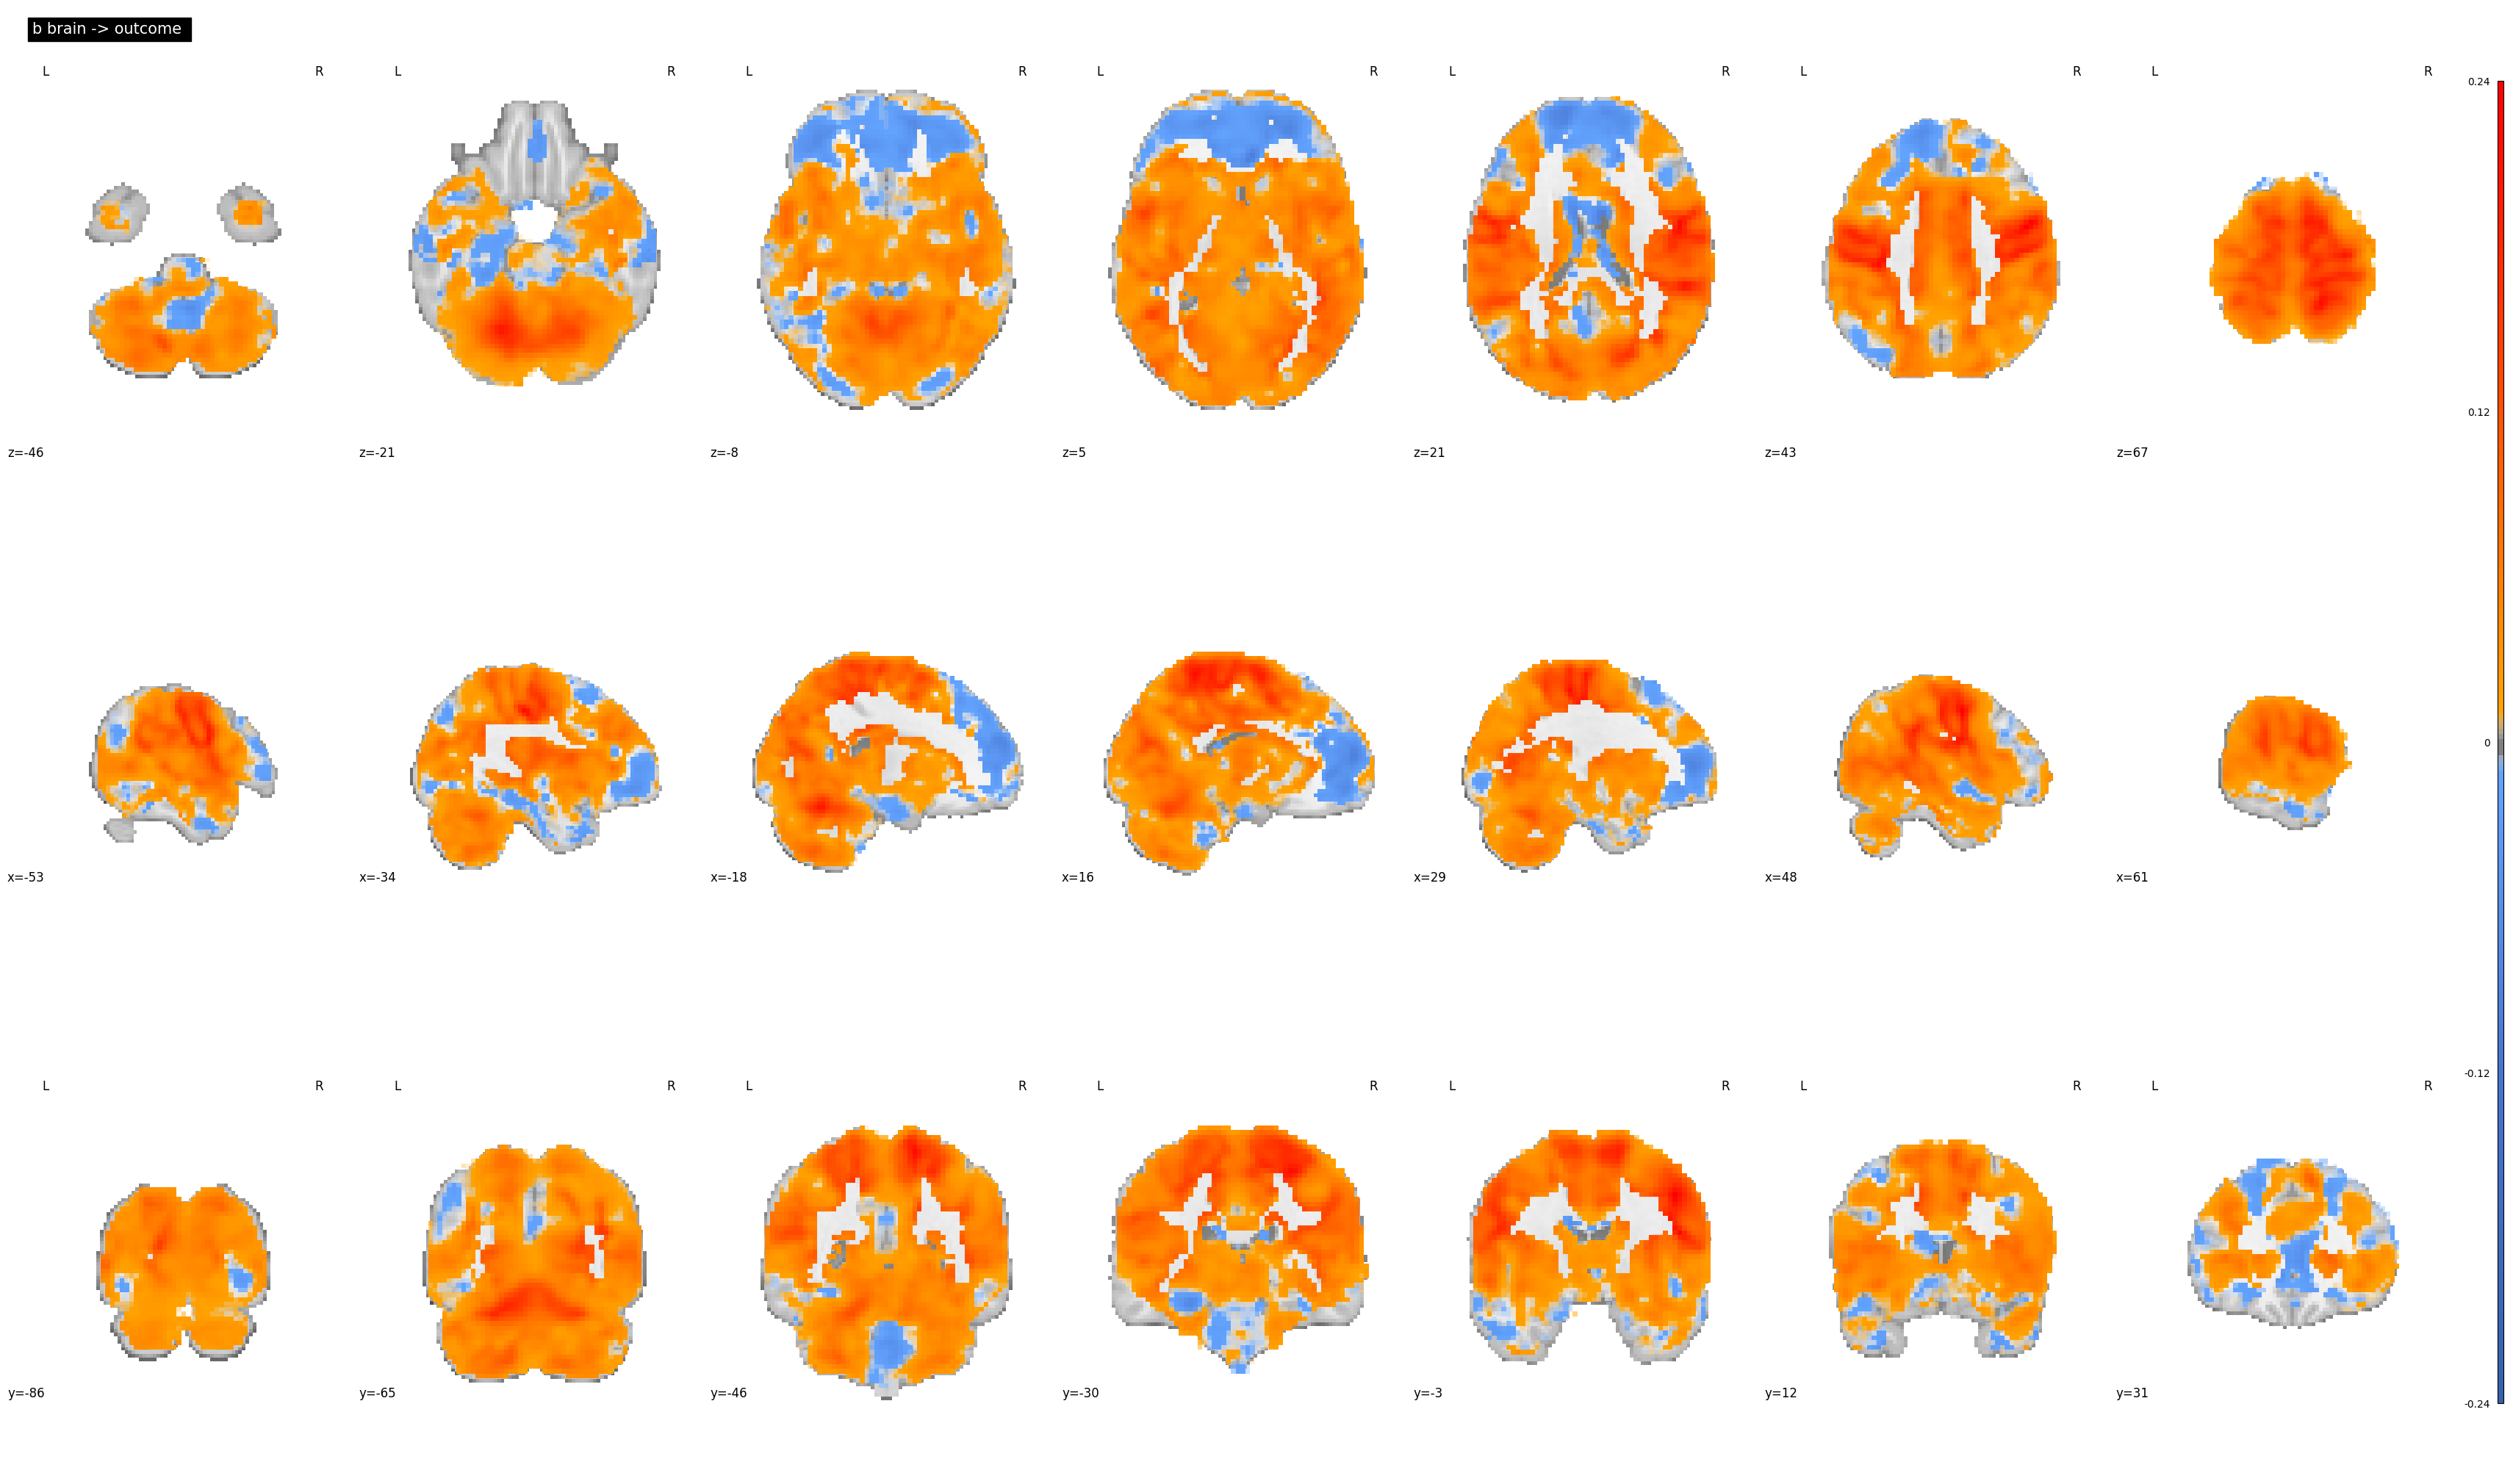

In [236]:
b_k5 = image.threshold_img(b, threshold=FDR_threshold, cluster_threshold=5)
plotting.plot_stat_map(b_k5, display_mode='mosaic', title='b brain -> outcome ', cmap=testcmap, threshold=FDR_threshold)


# current version: mask out based on FDR threshold

/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/_utils/niimg.py:61: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  warn(


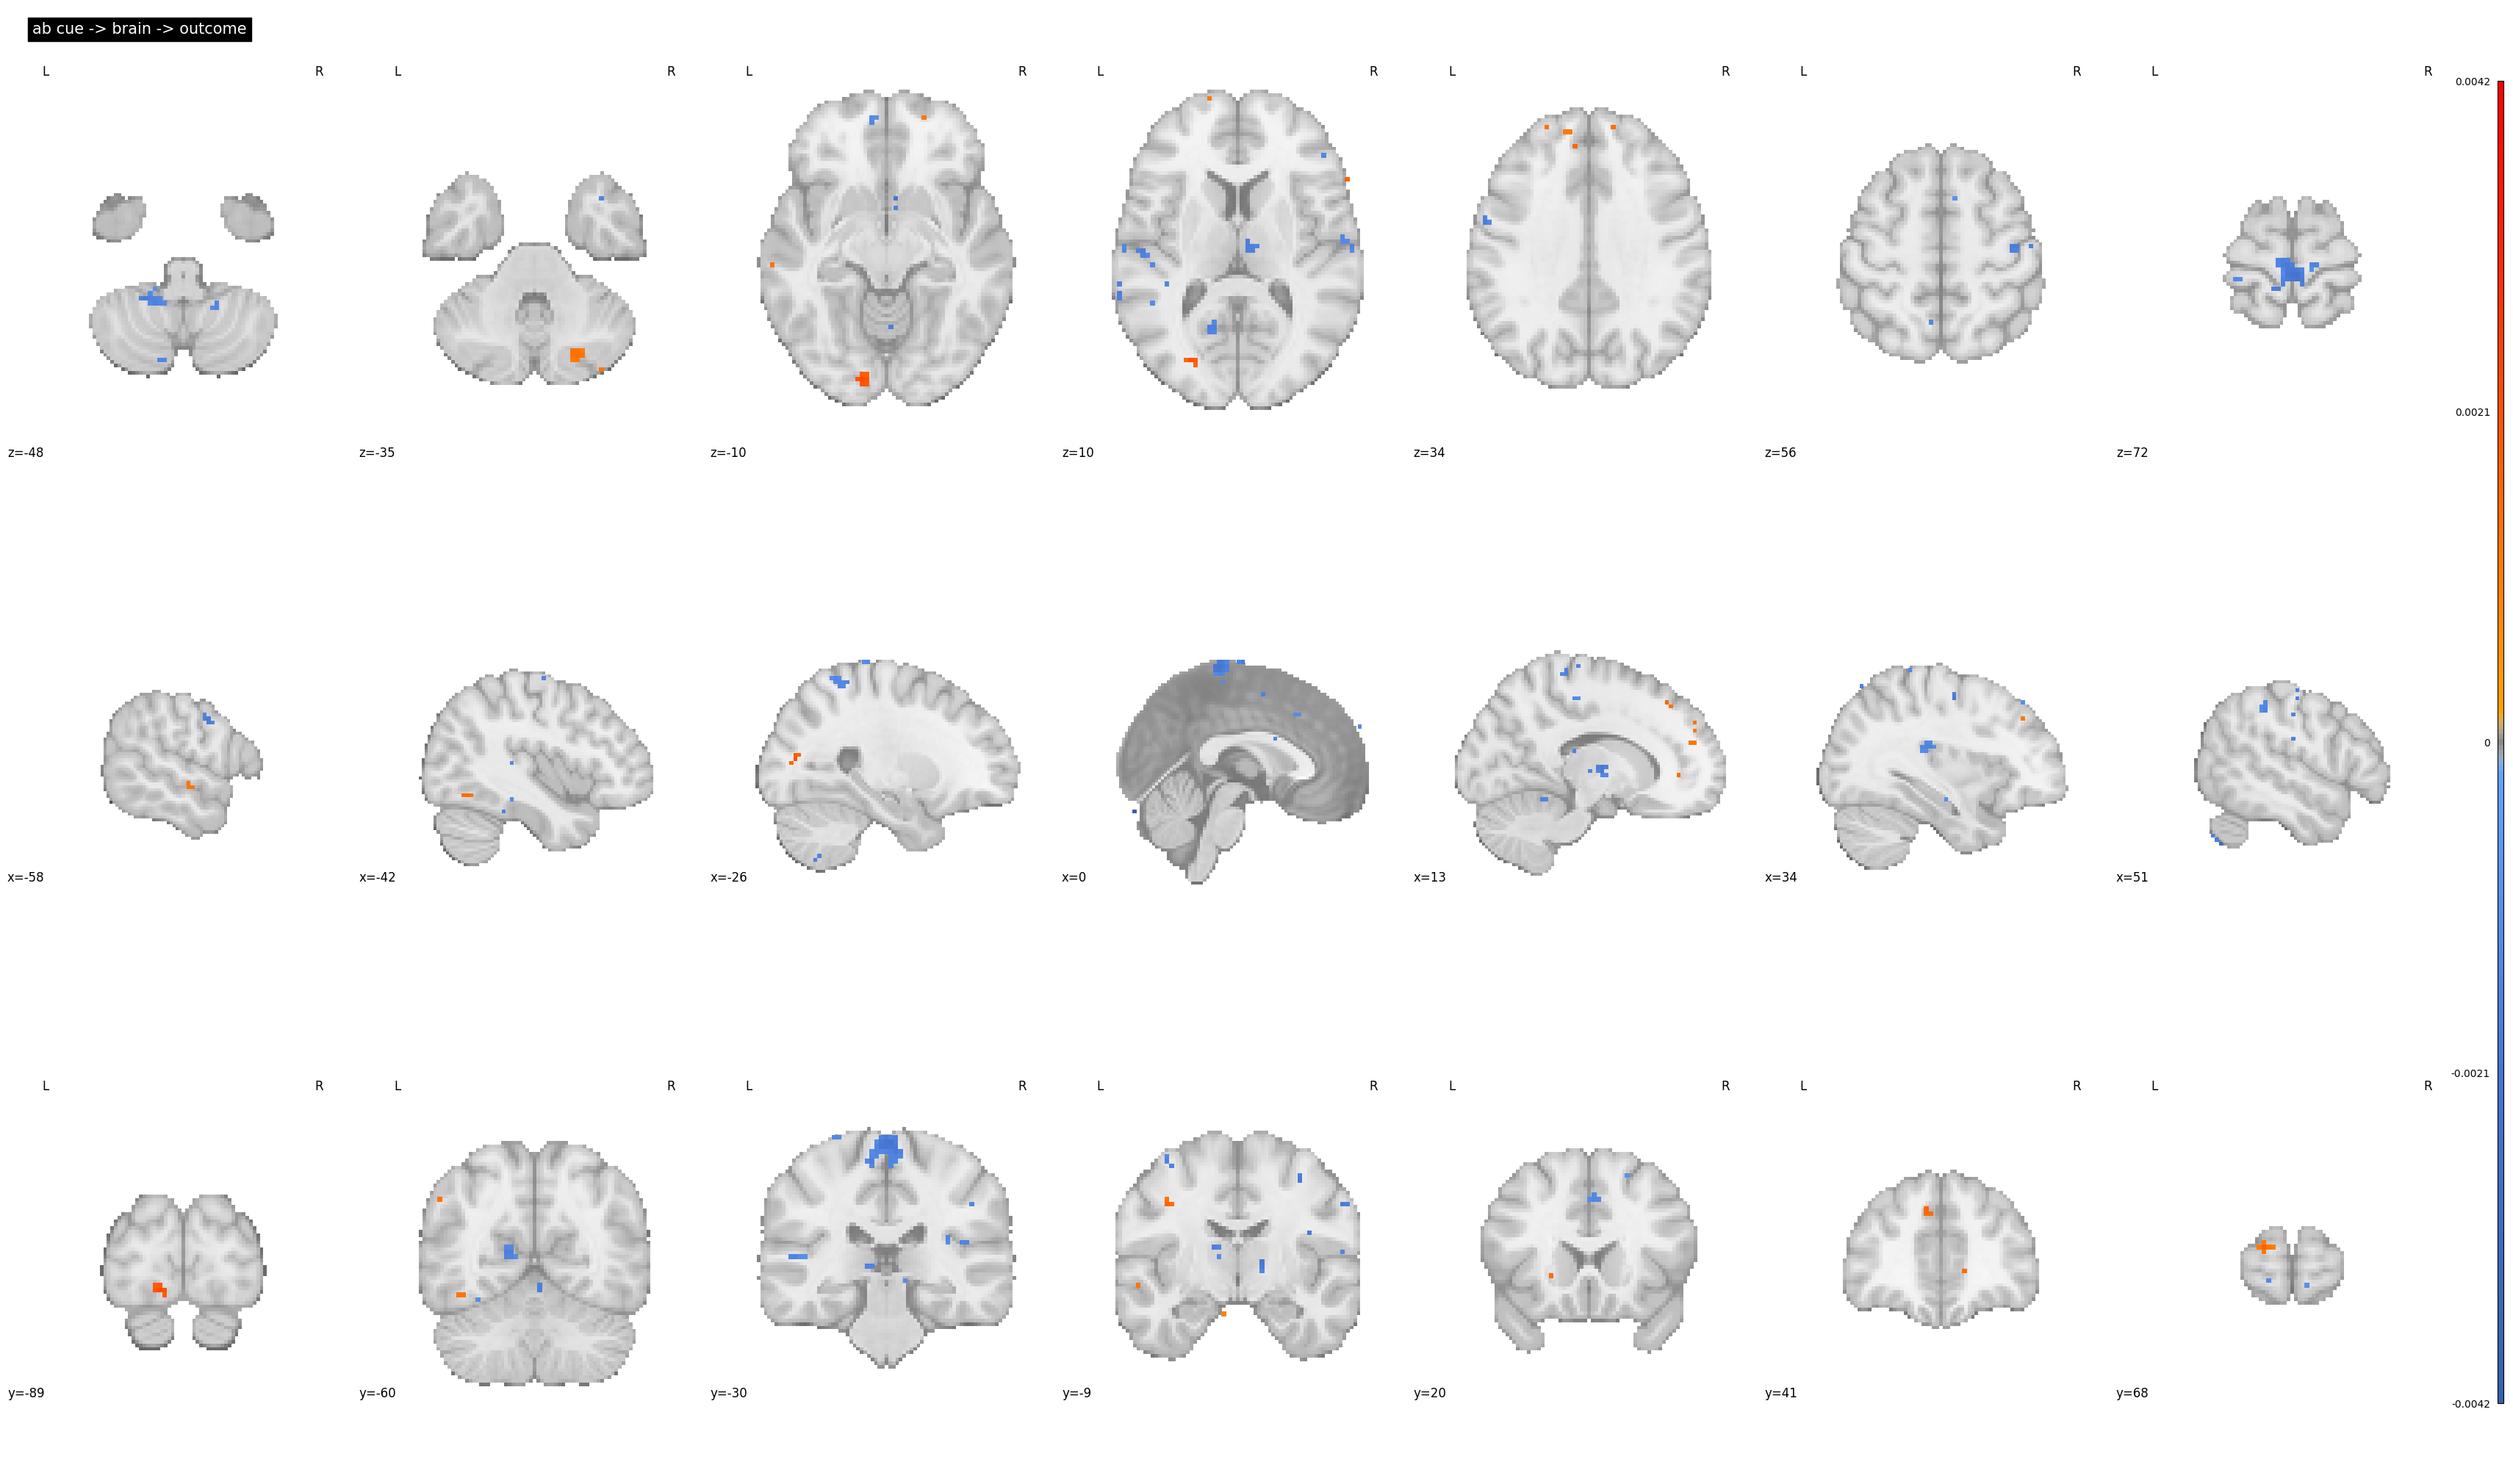

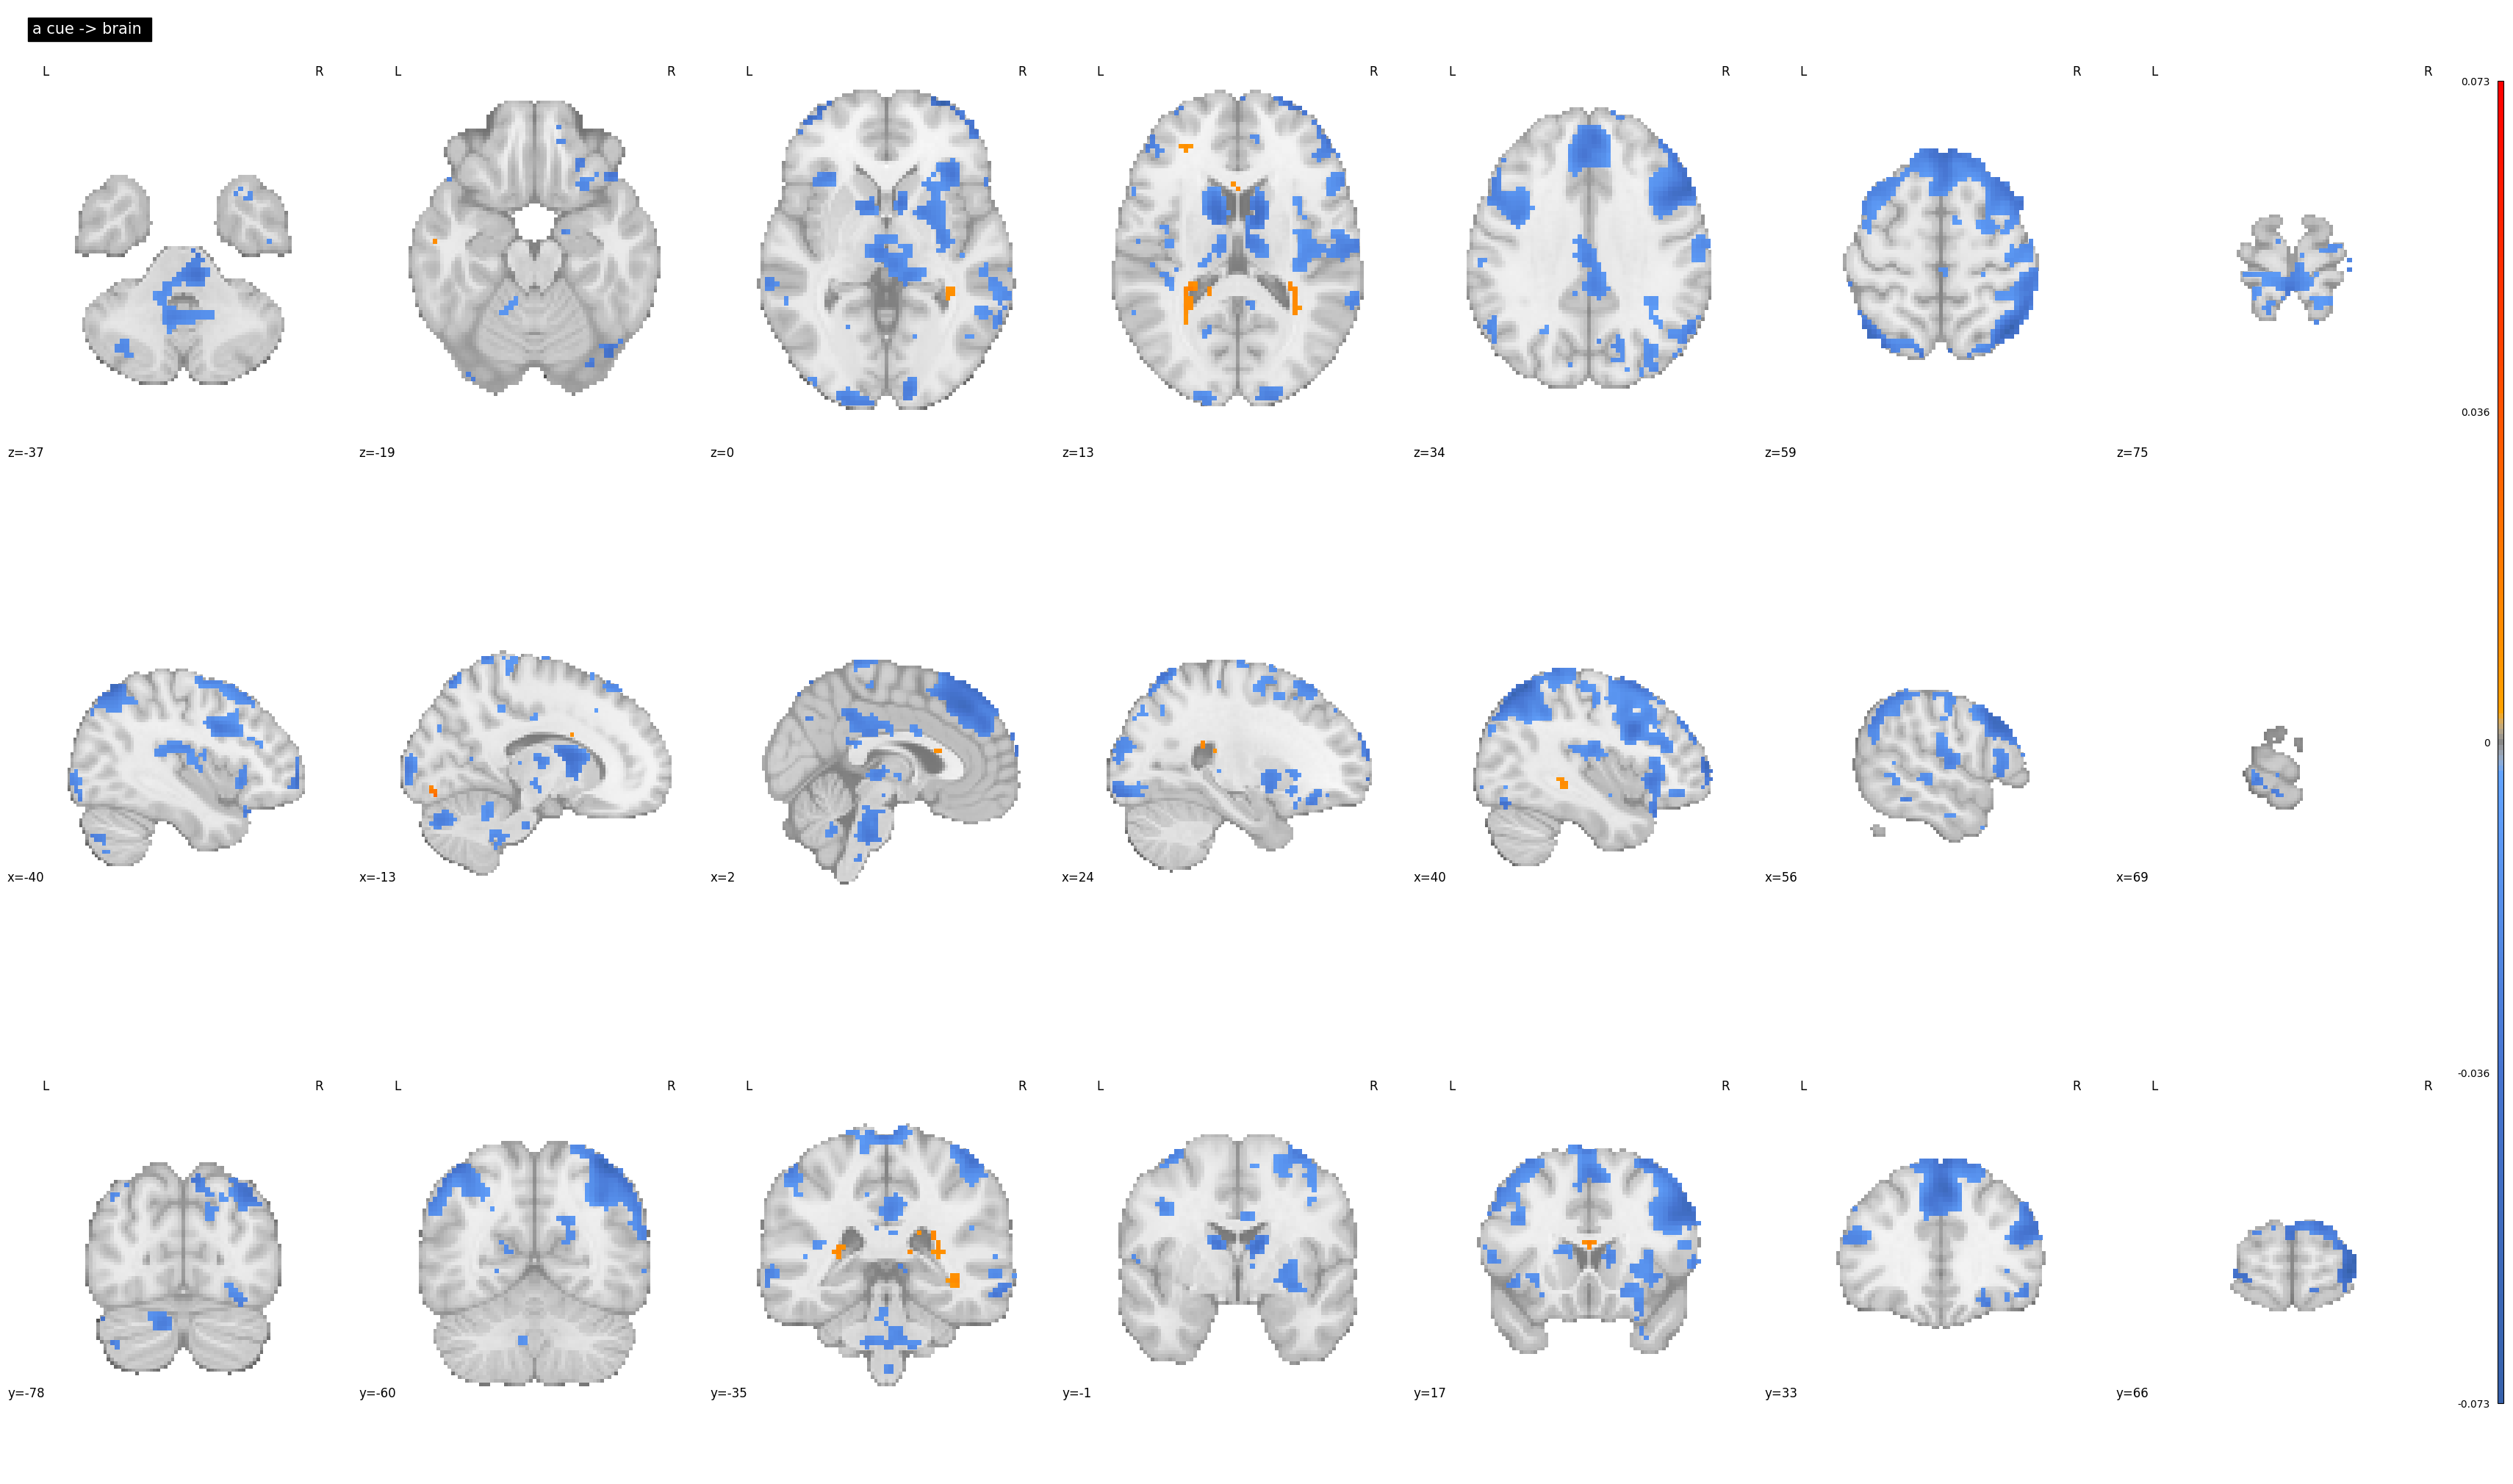

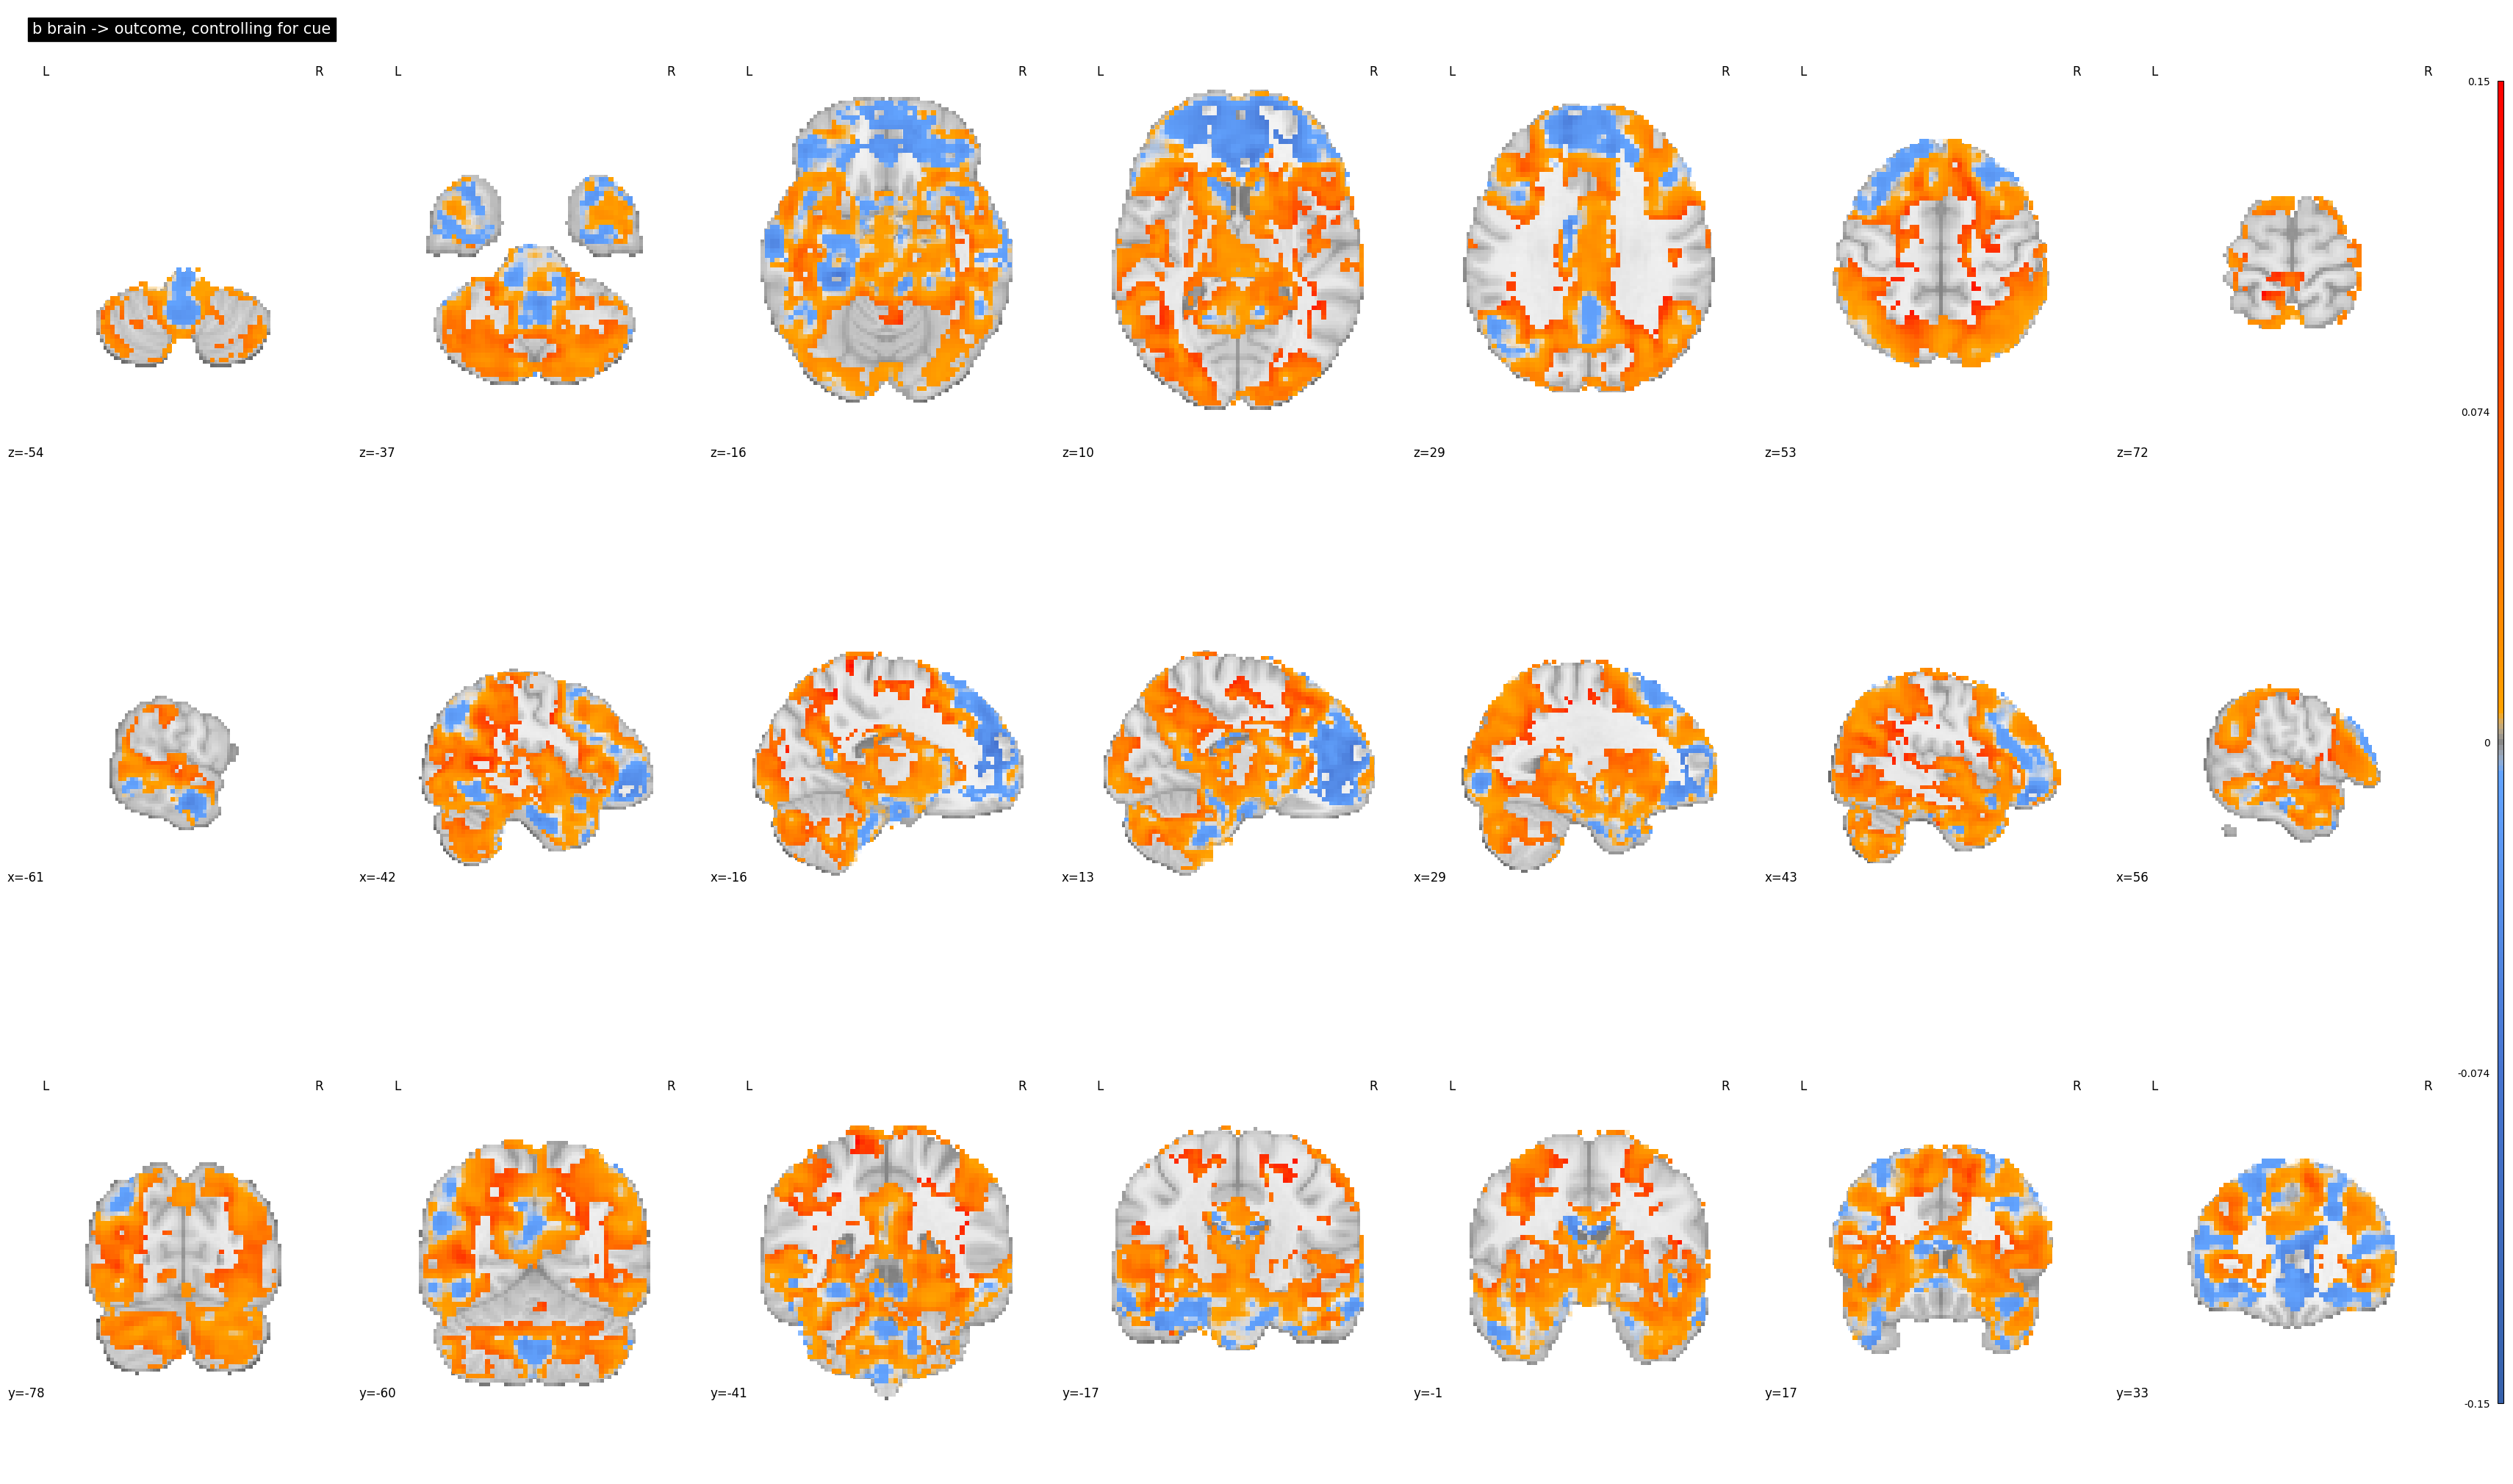

In [239]:
ab_mni = plotting.plot_stat_map(ab_thres_img, display_mode='mosaic', 
                                title='ab cue -> brain -> outcome', 
                                cmap=testcmap,threshold=0.0000001)

a_mni = plotting.plot_stat_map(a_thres_img, display_mode='mosaic', 
                               title='a cue -> brain ', 
                               cmap=testcmap, threshold=0.0000001)

b_mni = plotting.plot_stat_map(b_thres_img, display_mode='mosaic', 
                               title='b brain -> outcome, controlling for cue', 
                               cmap=testcmap,threshold=0.0000001)


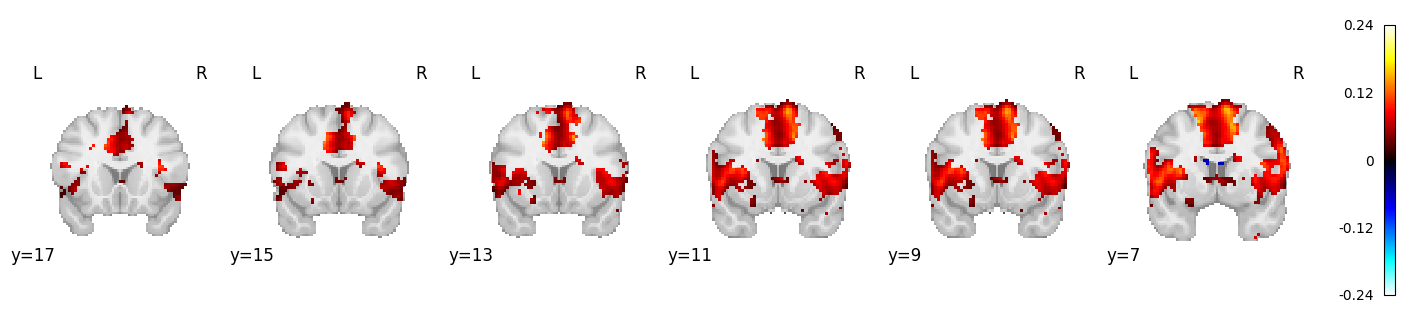

In [196]:
ab_mni = plotting.plot_stat_map(ab_thres_img, display_mode='mosaic', title='ab cue -> brain -> outcome',
                                output_file=join(save_dir, 'mni_X-cue_M-brain_Y-outcome_path-ab.png'))

a_mni = plotting.plot_stat_map(a_thres_img, display_mode='mosaic', title='a cue -> brain ',
                               output_file=join(save_dir, 'mni_X-cue_M-brain_Y-outcome_path-a.png'))

b_mni = plotting.plot_stat_map(b_thres_img, display_mode='mosaic', 
                               title='b brain -> outcome, controlling for cue', 
                               output_file=join(save_dir, 'mni_X-cue_M-brain_Y-outcome_path-b.png'))

cut_coords_list = plotting.find_cuts.find_cut_slices(b_thres_img, direction='y', n_cuts=20)
display = plotting.plot_stat_map(b_thres_img, display_mode='y', cut_coords=[17, 15, 13, 11, 9, 7])



pain range: nan nan
pain range: nan nan
pain range: nan nan


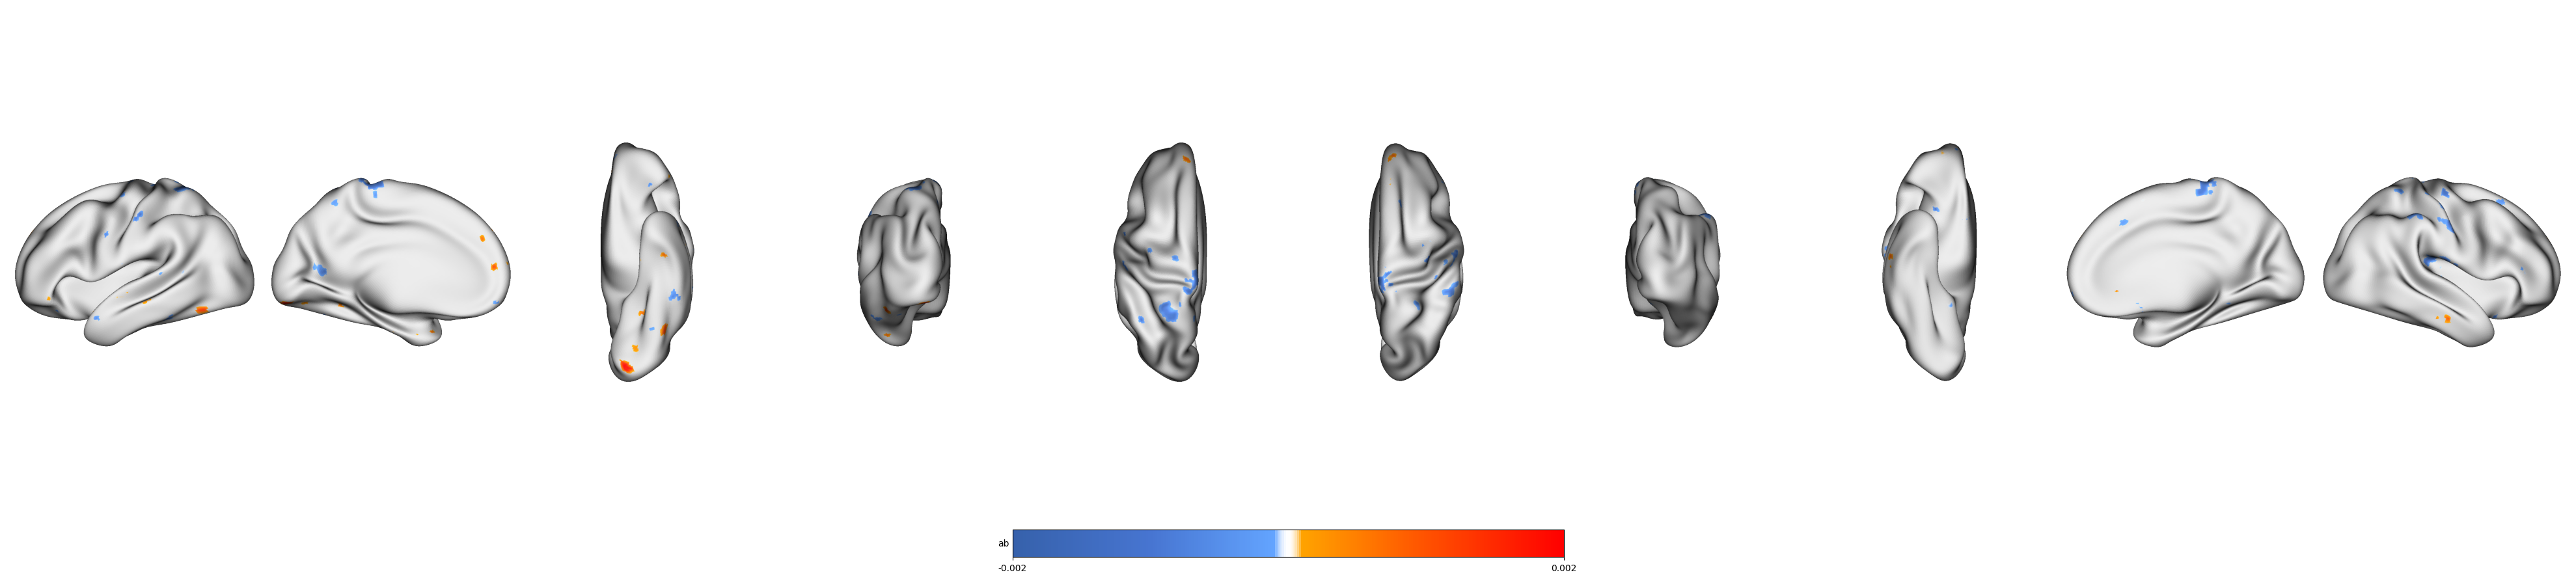

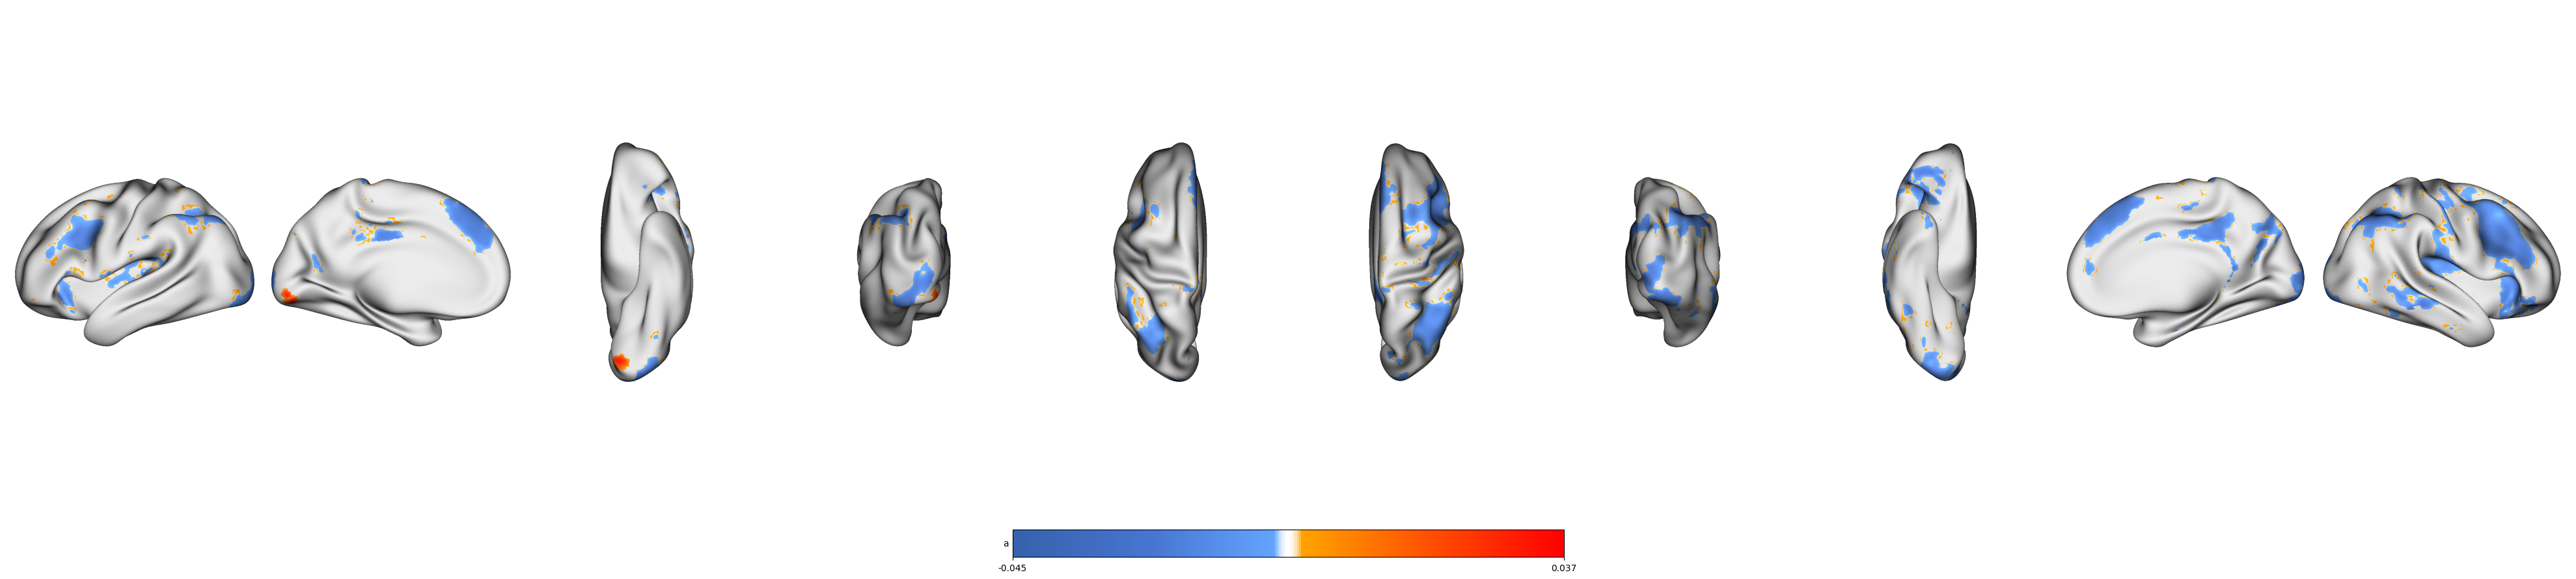

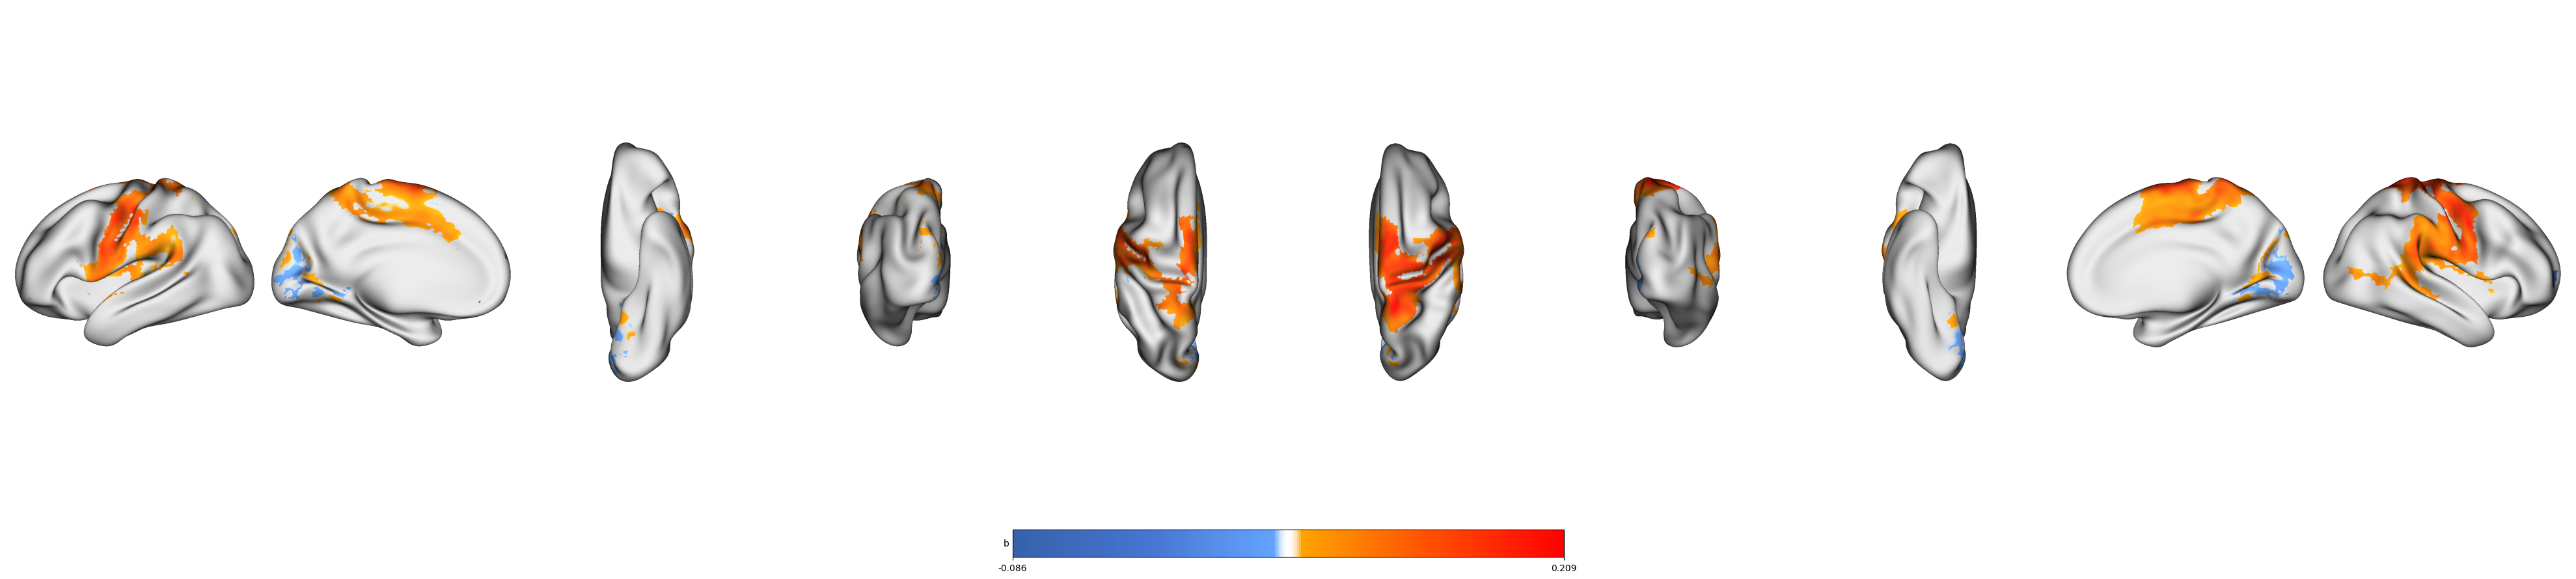

In [235]:
from nilearn.plotting.cm import _cmap_d as nilearn_cmaps

ab_fslr = transforms.mni152_to_fslr(ab_thres_img, fslr_density='32k', 
    method='linear')
max_ab = max(np.max(ab_fslr[0].agg_data()), np.max(ab_fslr[1].agg_data()))
min_ab = min(np.min(ab_fslr[0].agg_data()), np.min(ab_fslr[1].agg_data()))
print(f"pain range: {max_ab} {min_ab}")
max_ab = max(np.max(ab_fslr[0].agg_data()), np.max(ab_fslr[1].agg_data()),
              np.abs(np.min(ab_fslr[0].agg_data())), np.abs(np.max(ab_fslr[0].agg_data())))
ab_surf = plot_brain_surfaces(ab_fslr, cbar_label='ab',cmap=testcmap)#nilearn_cmaps['cold_hot'])
ab_surf.savefig(join(save_dir, 'surf_X-cue_M-brain_Y-outcome_path-ab.png'))
# a map ________________________________________________________________________
a_fslr = transforms.mni152_to_fslr(a_thres_img, fslr_density='32k', 
    method='linear')
max_a = max(np.max(a_fslr[0].agg_data()), np.max(a_fslr[1].agg_data()))
min_a = min(np.min(a_fslr[0].agg_data()), np.min(a_fslr[1].agg_data()))
print(f"pain range: {max_a} {min_a}")
max_a = max(np.max(a_fslr[0].agg_data()), np.max(a_fslr[1].agg_data()),
              np.abs(np.min(a_fslr[0].agg_data())), np.abs(np.max(a_fslr[0].agg_data())))
a_surf = plot_brain_surfaces(a_fslr, cbar_label='a', cmap=testcmap) #nilearn_cmaps['cold_hot']) #  cmap=nilearn_cmaps['cold_hot_r'])
a_surf.savefig(join(save_dir, 'surf_X-cue_M-brain_Y-outcome_path-a.png'))

b_fslr = transforms.mni152_to_fslr(b_thres_img, fslr_density='32k', 
    method='linear')
max_b = max(np.max(b_fslr[0].agg_data()), np.max(b_fslr[1].agg_data()))
min_b = min(np.min(b_fslr[0].agg_data()), np.min(b_fslr[1].agg_data()))
print(f"pain range: {max_b} {min_b}")
max_b = max(np.max(b_fslr[0].agg_data()), np.max(b_fslr[1].agg_data()),
              np.abs(np.min(b_fslr[0].agg_data())), np.abs(np.max(b_fslr[0].agg_data())))
b_surf = plot_brain_surfaces(b_fslr, cbar_label='b', cmap=testcmap)#nilearn_cmaps['cold_hot'])
                            #  cmap=nilearn_cmaps['cold_hot_r'])
b_surf.savefig(join(save_dir, 'surf_X-cue_M-brain_Y-outcome_path-b.png'))
